### Week 3 - Assignment - Bags of Popcorn

This references the tutorial at https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df_movies = pd.read_csv('popcorn/labeledTrainData.tsv', delimiter='\t', header=0, quoting=3)
df_movies.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
df_movies.sample(5)

,id,sentiment,review
24543,"""3364_1""",0,"""So it starts with a beautiful old house in th..."
12623,"""7534_4""",0,"""A mummy narrates vignettes about men, women, ..."
21048,"""1049_3""",0,"""This movie has a very Broadway feel - the bac..."
24310,"""8085_2""",0,"""Oh the hilarity! Oh the joy! Another film tha..."
17747,"""5912_2""",0,"""Having enjoyed Mike Myers previous work (Wayn..."


In [4]:
df_movies.shape

(25000, 3)

In [5]:
df_movies.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [6]:
df_movies['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

#### Comment
I can see that review contains HTML data. So it makes sense to clean data with BeautifulSoup.

In [7]:
from bs4 import BeautifulSoup

In [8]:
# test cleaning HTML data with bs4
print(BeautifulSoup(df_movies['review'][0]).get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
import re
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [11]:
def preprocess(review):
    # Remove HTML    
    review_text = BeautifulSoup(review).get_text()
    
    # Remove non-letter
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)

    return review_text

In [12]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [13]:
def tokenizer(text):
    return [porter.stem(word) for word in text.split()]

### Prepare Data

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_movies['review'].values, 
                                                    df_movies['sentiment'].values, 
                                                    test_size = 0.1, 
                                                    random_state = 100)

In [24]:
vectorizer = TfidfVectorizer(stop_words=stop, 
                             preprocessor=preprocess, 
                             tokenizer=tokenizer, 
                             max_features=50000)

clf = Pipeline([('vect', vectorizer), 
                ('clf', LogisticRegression(random_state=10))])

clf.fit(X_train, y_train)

/Users/antran/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function prep..., penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [96]:
len(vectorizer.get_feature_names())

48604

In [25]:
X_transformed = vectorizer.fit_transform(X_train)
X_transformed.toarray().shape

(22500, 48604)

In [26]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [32]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8872


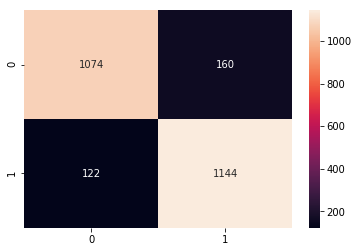

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1234
           1       0.88      0.90      0.89      1266

   micro avg       0.89      0.89      0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



### Examine Incorrect Predictions

In [83]:
y_wrong = y_pred[y_test != y_pred]

In [84]:
X_wrong = X_test[y_test != y_pred]

In [85]:
df_wrong = pd.DataFrame(X_wrong, columns=['review'])
df_wrong.head()

,review
0,"""Why do movie makers always go against the aut..."
1,"""This is a gory mess and pretty convincing. Co..."
2,"""The first half of this movie is a pure deligh..."
3,"""Thoughtless, ignorant, ill-conceived, career-..."
4,"""I think this movie is well done and realistic..."


In [86]:
df_wrong['predicted_label'] = y_wrong

In [87]:
df_pred = pd.DataFrame(clf.predict_proba(X_wrong))

In [88]:
df_wrong = pd.concat([df_wrong, df_pred], axis=1).head()
df_wrong.head()

,review,predicted_label,0,1
0,"""Why do movie makers always go against the aut...",1,0.269548,0.730452
1,"""This is a gory mess and pretty convincing. Co...",0,0.542459,0.457541
2,"""The first half of this movie is a pure deligh...",1,0.300551,0.699449
3,"""Thoughtless, ignorant, ill-conceived, career-...",1,0.496808,0.503192
4,"""I think this movie is well done and realistic...",0,0.573338,0.426662


In [89]:
df_wrong = df_wrong.rename(columns={0: 'prob as neg', 1: 'prob as pos'})
df_wrong.head()

,review,predicted_label,prob as neg,prob as pos
0,"""Why do movie makers always go against the aut...",1,0.269548,0.730452
1,"""This is a gory mess and pretty convincing. Co...",0,0.542459,0.457541
2,"""The first half of this movie is a pure deligh...",1,0.300551,0.699449
3,"""Thoughtless, ignorant, ill-conceived, career-...",1,0.496808,0.503192
4,"""I think this movie is well done and realistic...",0,0.573338,0.426662


In [92]:
df_movies[df_movies.review.str.contains('Why do movie makers always go against the au')]['review'].values

array(['"Why do movie makers always go against the author\'s work? I mean, yes, things have to be condensed for the sake of viewer interest, but look at Anne of Green Gables. They did a wonderful job of combining important events into a cohesive whole that was simply delightful. I can\'t believe that they chose to combine three novels together for Anne of Avonlea into such a dreadful mess. Look at all they missed out on by doing that . . . Paul Irving, little Elizabeth, the widows, Windy Poplars . . . and Anne\'s college years, for heaven\'s sake!!! Wouldn\'t it have been delightful to meet Priscilla and all the rest of the Redmond gang? Kevin Sullivan should have taken things one movie at a time, instead of jumbling them all together and combining characters and events the way he did. This movie was good, if you leave the novels out of it!! But L.M. Montgomery\'s beautiful work is something that should not be denied. This movie was a let down after seeing the successful way he brough 

### Comment
Looking at the above review, it's a negative review, while it's predicted as postive review.